In [ ]:
 Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [54]:
import warnings
warnings.filterwarnings("ignore")


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [56]:
df_bank = pd.read_csv("Downloads\\bank-full.csv",sep=';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [57]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [58]:
columns = ['age', 'balance', 'duration', 'campaign', 'y']
df_bank1= df_bank[columns]

In [59]:
df_bank1['outcome'] = df_bank1.y.map({'no':0, 'yes':1})
df_bank1

,age,balance,duration,campaign,y,outcome
0,58,2143,261,1,no,0
1,44,29,151,1,no,0
2,33,2,76,1,no,0
3,47,1506,92,1,no,0
4,33,1,198,1,no,0
...,...,...,...,...,...,...
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0


In [60]:
df_bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
 5   outcome   45211 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 2.1+ MB


In [61]:
df_bank1.shape

(45211, 6)

In [62]:
df_bank1.isnull().sum()

age         0
balance     0
duration    0
campaign    0
y           0
outcome     0
dtype: int64

In [63]:
df_bank1[df_bank1.isnull().any(axis=1)]

,age,balance,duration,campaign,y,outcome


In [64]:
df_bank1=df_bank1.dropna()
df_bank1.shape

(45211, 6)

In [65]:
X=df_bank1.iloc[:,0:4]
Y=df_bank1.iloc[:,5]

In [66]:
classifier = LogisticRegression()

In [67]:
classifier.fit(X,Y)

LogisticRegression()

In [68]:
classifier.coef_

array([[ 7.69722351e-03,  3.72191047e-05,  3.54908922e-03,
        -1.39828340e-01]])

In [69]:
Beta_Coefficients=pd.Series(classifier.coef_[0])
Beta_Coefficients

0    0.007697
1    0.000037
2    0.003549
3   -0.139828
dtype: float64

In [70]:
Coef_df=pd.DataFrame({'Variables':['age','balance','duration','campaign'],'Beta Coefficient':Beta_Coefficients})
Coef_df

,Variables,Beta Coefficient
0,age,0.007697
1,balance,0.000037
2,duration,0.003549
3,campaign,-0.139828


In [71]:
classifier.intercept_

array([-3.24652383])

In [72]:
classifier.classes_

array([0, 1], dtype=int64)

In [73]:
classifier.predict_proba(X)[0:20]

array([[0.87367388, 0.12632612],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       [0.9335171 , 0.0664829 ],
       [0.91905581, 0.08094419],
       [0.93182254, 0.06817746],
       [0.9156022 , 0.0843978 ],
       [0.84739841, 0.15260159],
       [0.94036106, 0.05963894],
       [0.94470032, 0.05529968],
       [0.90660077, 0.09339923],
       [0.93477067, 0.06522933],
       [0.75828444, 0.24171556],
       [0.93615276, 0.06384724],
       [0.9108485 , 0.0891515 ],
       [0.84972452, 0.15027548],
       [0.93653406, 0.06346594],
       [0.94325717, 0.05674283],
       [0.89520391, 0.10479609],
       [0.94982176, 0.05017824]])

In [74]:
classifier.score(X,Y)

0.8890756674260689

In [75]:
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [76]:
y_pred_df=pd.DataFrame({'actual':Y,'predictions':classifier.predict(X)})

In [77]:
y_pred_df

,actual,predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y,y_pred)
print(cm)

[[39342   580]
 [ 4435   854]]


In [78]:
TP=len(y_pred_df[(y_pred_df['actual']==1)&(y_pred_df['predictions']==1)])
TN=len(y_pred_df[(y_pred_df['actual']==0)&(y_pred_df['predictions']==0)])
FP=len(y_pred_df[(y_pred_df['actual']==0)&(y_pred_df['predictions']==1)])
FN=len(y_pred_df[(y_pred_df['actual']==1)&(y_pred_df['predictions']==0)])

In [79]:
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)

True Positive: 854
True Negative: 39342
False Positive: 580
False Negative: 4435


In [82]:
accuracy=((TP+TN)/(TP+TN+FP+FN))*100
print('accuracy:',round(accuracy,2))

accuracy: 88.91


In [83]:
sensitivity=(TP/(TP+FN))
print('sensitivity:',round(sensitivity,2))

sensitivity: 0.16


In [84]:
specificity=(TN/(TN+FP))
print('specificity:',round(specificity,2))

specificity: 0.99


In [85]:
precision=(TP/(TP+FP))
print('precision:',round(precision,2))

precision: 0.6


In [86]:
F_score=(2*precision*sensitivity)/(precision+sensitivity)
print('F_score:',round(F_score,2))

F_score: 0.25


In [87]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(Y,y_pred)
print(auc)

0.5734694329116669


Text(0, 0.5, 'True Positive Rate')

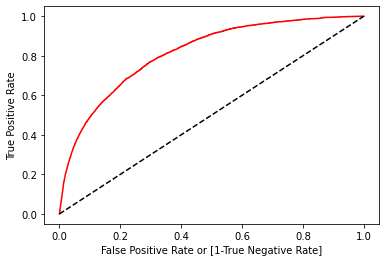

In [89]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logitmodel(area=50.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')